In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import joblib


LOADING DATASET


In [ ]:
df = pd.read_excel("./DataSet/flood dataset.xlsx")



Reading the DataSet

In [63]:
df.head(10)


,Temp,Humidity,Cloud Cover,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,avgjune,sub,flood
0,29,70,30,3248.6,73.4,386.2,2122.8,666.1,274.866667,649.9,0
1,28,75,40,3326.6,9.3,275.7,2403.4,638.2,130.300000,256.4,1
2,28,75,42,3271.2,21.7,336.3,2343.0,570.1,186.200000,308.9,0
3,29,71,44,3129.7,26.7,339.4,2398.2,365.3,366.066667,862.5,0
4,31,74,40,2741.6,23.4,378.5,1881.5,458.1,283.400000,586.9,0
5,30,70,38,2708.0,34.1,230.0,1943.1,500.8,138.300000,254.1,0
6,29,74,40,3671.1,23.7,328.0,2737.8,581.7,256.966667,669.5,1
7,30,78,36,2648.3,28.8,283.7,2023.6,312.2,197.533333,450.0,0
8,30,71,40,3050.2,65.9,628.3,1940.4,415.5,234.900000,231.5,0
9,30,70,34,2848.6,28.4,296.7,1886.5,637.0,226.666667,531.2,0





<h1> <B>UNIVARIATE ANALYSIS </B></H1>





**Distribution plots**

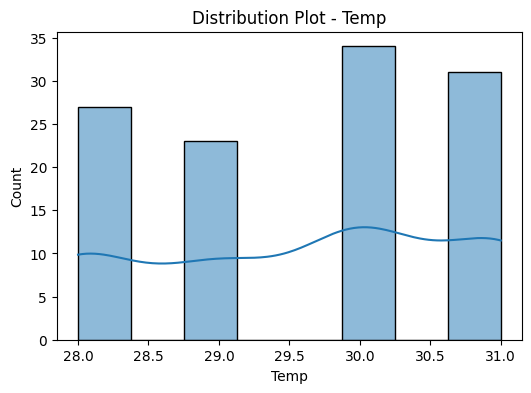

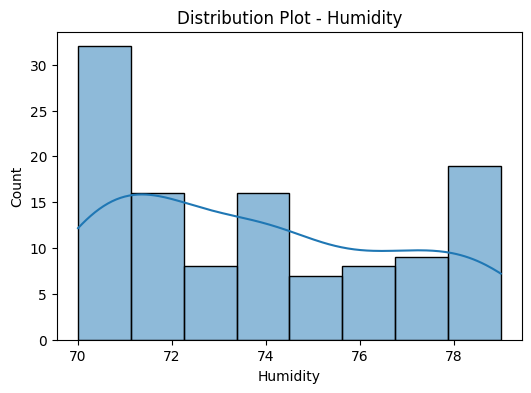

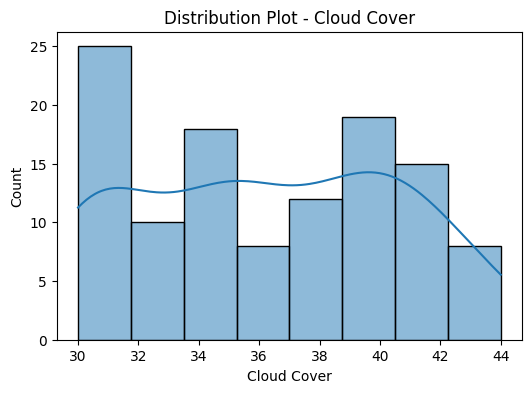

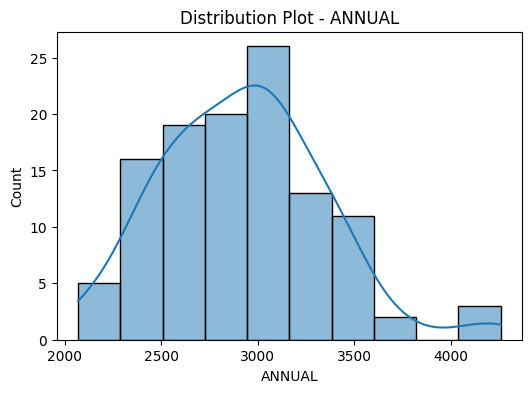

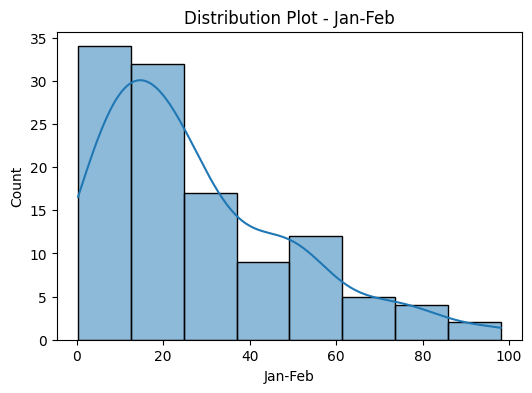

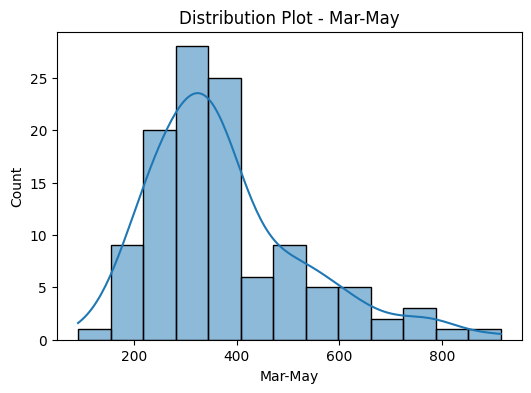

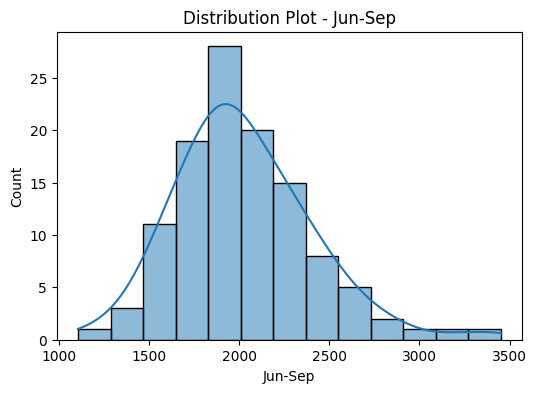

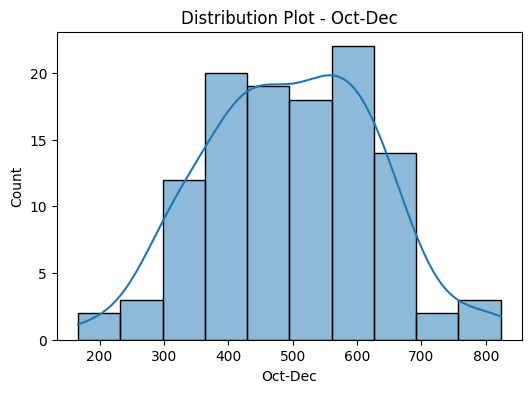

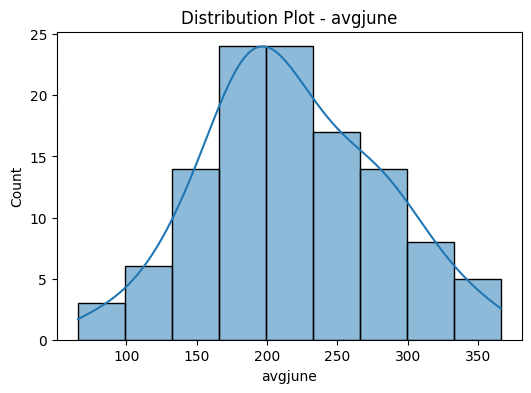

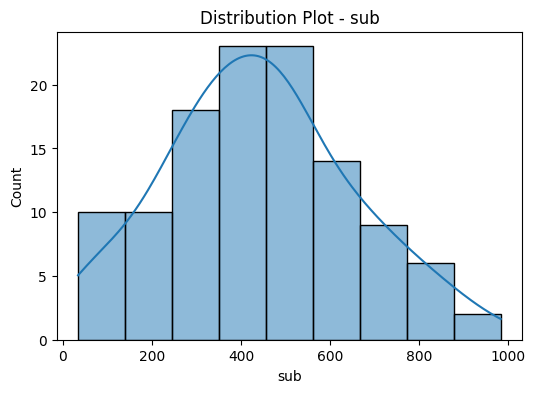

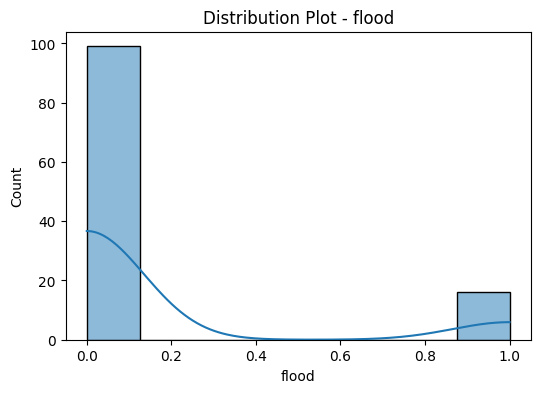

In [64]:
num_cols = df.select_dtypes(include=['int64','float64']).columns

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution Plot - {col}')
    plt.show()



**Box Plots**

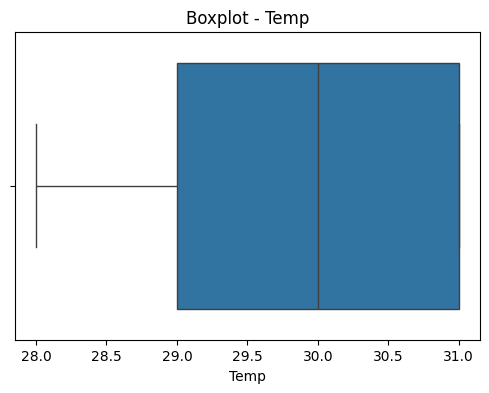

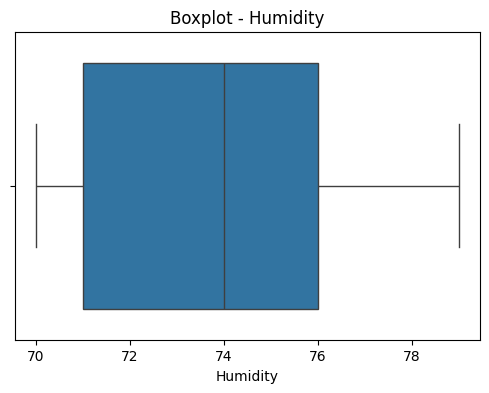

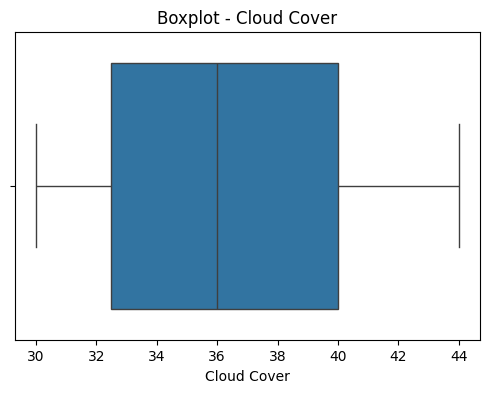

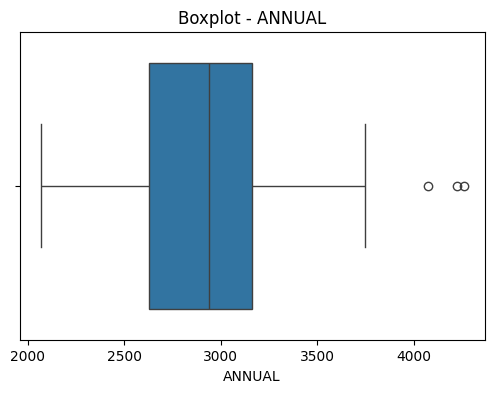

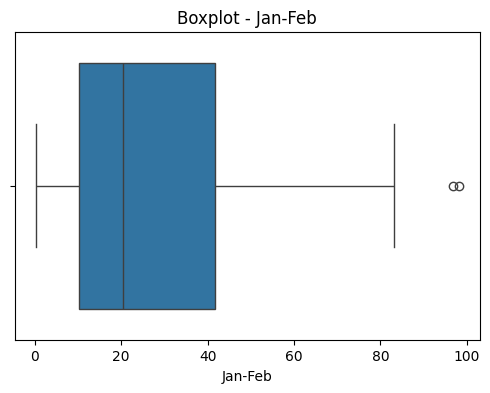

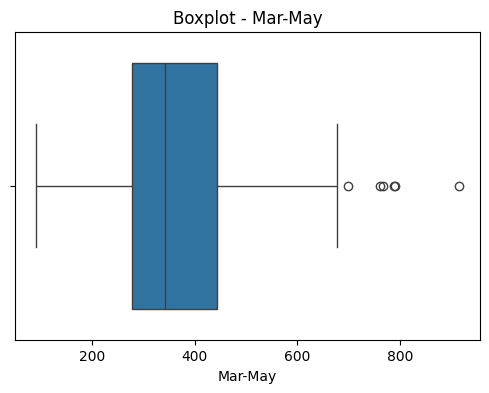

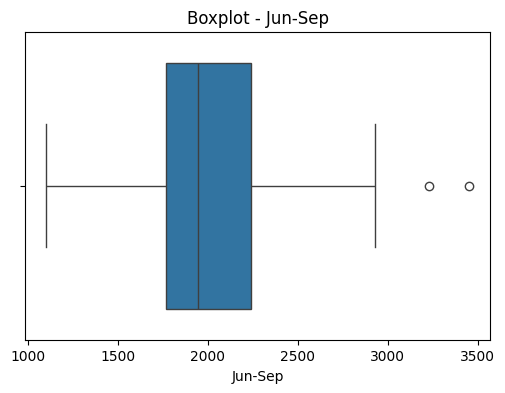

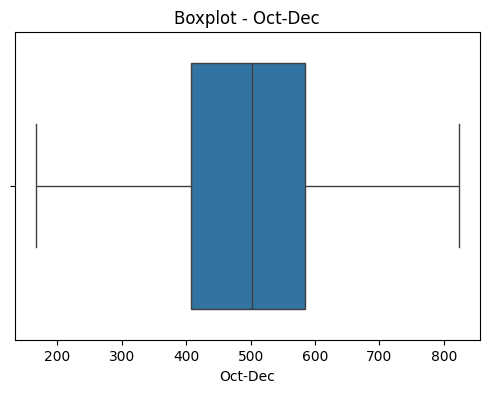

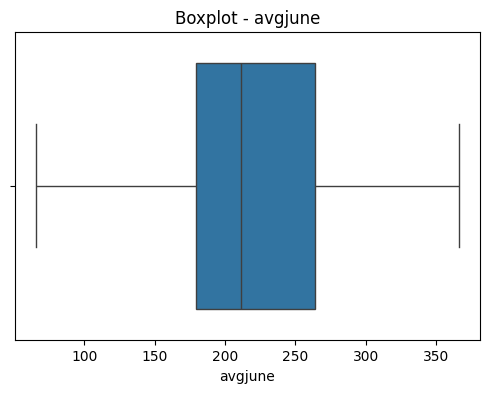

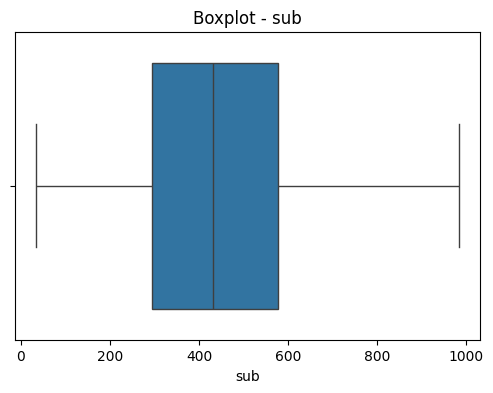

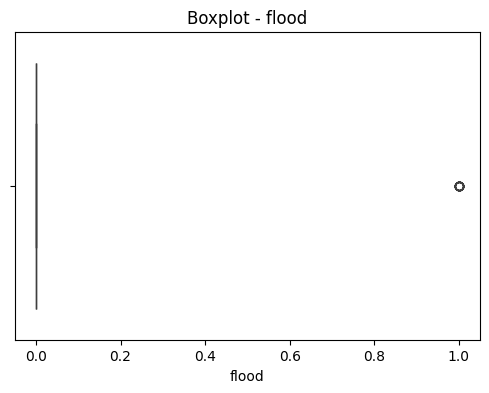

In [65]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot - {col}')
    plt.show()




```
# This is formatted as code
```
<h1><b>CORRELATION HEATMAP</b></h1>



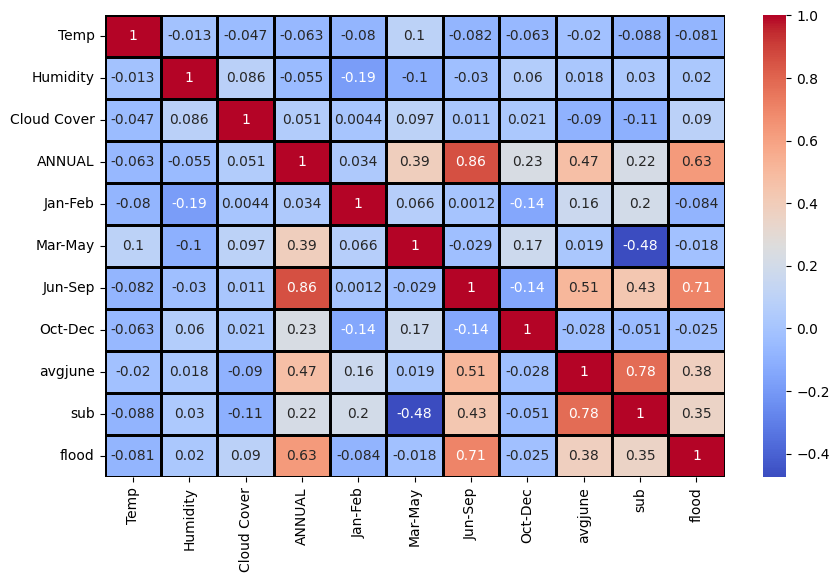

In [66]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm",
            linewidths=1, linecolor='k')
plt.show()




```
# This is formatted as code
```

<h1><b>descriptive Analysis</b></h1>

In [67]:
df.head()

,Temp,Humidity,Cloud Cover,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,avgjune,sub,flood
0,29,70,30,3248.6,73.4,386.2,2122.8,666.1,274.866667,649.9,0
1,28,75,40,3326.6,9.3,275.7,2403.4,638.2,130.300000,256.4,1
2,28,75,42,3271.2,21.7,336.3,2343.0,570.1,186.200000,308.9,0
3,29,71,44,3129.7,26.7,339.4,2398.2,365.3,366.066667,862.5,0
4,31,74,40,2741.6,23.4,378.5,1881.5,458.1,283.400000,586.9,0


In [68]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temp         115 non-null    int64  
 1   Humidity     115 non-null    int64  
 2   Cloud Cover  115 non-null    int64  
 3   ANNUAL       115 non-null    float64
 4   Jan-Feb      115 non-null    float64
 5   Mar-May      115 non-null    float64
 6   Jun-Sep      115 non-null    float64
 7   Oct-Dec      115 non-null    float64
 8   avgjune      115 non-null    float64
 9   sub          115 non-null    float64
 10  flood        115 non-null    int64  
dtypes: float64(7), int64(4)
memory usage: 10.0 KB


,Temp,Humidity,Cloud Cover,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,avgjune,sub,flood
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000
mean,29.600000,73.852174,36.286957,2925.487826,27.739130,377.253913,2022.840870,497.636522,218.100870,439.801739,0.139130
std,1.122341,2.947623,4.330158,422.112193,22.361032,151.091850,386.254397,129.860643,62.547597,210.438813,0.347597
min,28.000000,70.000000,30.000000,2068.800000,0.300000,89.900000,1104.300000,166.600000,65.600000,34.200000,0.000000
25%,29.000000,71.000000,32.500000,2627.900000,10.250000,276.750000,1768.850000,407.450000,179.666667,295.000000,0.000000
50%,30.000000,74.000000,36.000000,2937.500000,20.500000,342.000000,1948.700000,501.500000,211.033333,430.600000,0.000000
75%,31.000000,76.000000,40.000000,3164.100000,41.600000,442.300000,2242.900000,584.550000,263.833333,577.650000,0.000000
max,31.000000,79.000000,44.000000,4257.800000,98.100000,915.200000,3451.300000,823.300000,366.066667,982.700000,1.000000




```
# This is formatted as code
```
<h1><b>DATA PREPROSSING</b></h1>


**Handeling Missing Values**

In [69]:
df.isnull().any()


,0
Temp,False
Humidity,False
Cloud Cover,False
ANNUAL,False
Jan-Feb,False
Mar-May,False
Jun-Sep,False
Oct-Dec,False
avgjune,False
sub,False


In the dataset all the values are in the required rage. outlires replacing is not neccesary.so iam skipping this step.

In the dataset there is no catagorical data type.so iam skipping this step

**Splitting the dataset**

splitting into dependent and independent values

In [70]:
features = [
    "Cloud Cover",
    "ANNUAL",
    "Jan-Feb",
    "Mar-May",
    "Jun-Sep"
]

X = df[features]
y = df["flood"]        # target column


In [71]:
# x = df.iloc[:, 2:7].values
# y = df.iloc[:, 9:].values

FEATURE TARGET SPLITTING

TRAIN TEST SPLIT

In [72]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=10,
)


FEATURE SCALING

In [73]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Saving the standard Scaler

In [74]:
import joblib

joblib.dump(scaler, "transform.save")

['transform.save']

from google.colab import drive
drive.mount('/content/drive')





<h1><b>MODEL BUILDING</b></h1>

**KNN**

In [75]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsClassifier()

**DESITION TREE**

In [76]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

**RANDOM FOREST**

In [77]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

**XG BOOST**

In [78]:
xg_clas = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    random_state=42
)
xg_clas.fit(X_train, y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

**model comparison table**

Predections

In [79]:
p1 = knn.predict(X_test)
p2 = dt.predict(X_test)
p3 = rf.predict(X_test)
p4 = xg_clas.predict(X_test)


In [80]:
predictions = {
    "KNN": p1,
    "Decision Tree": p2,
    "Random Forest": p3,
    "Xg Boost": p4
}

Comparing the models

In [81]:
print("KNN:", accuracy_score(y_test,p1 ))
print("Desition Tree:", accuracy_score(y_test,p2 ))
print("Random Forest:", accuracy_score(y_test,p3 ))
print("Xg Boost:", accuracy_score(y_test,p4 ))

KNN: 0.896551724137931
Desition Tree: 0.9655172413793104
Random Forest: 0.9655172413793104
Xg Boost: 0.9655172413793104


**Evaluating the Perfomance**





Confusion Metrics

In [82]:
from sklearn.metrics import confusion_matrix

for name, pred in predictions.items():
    cm = confusion_matrix(y_test, pred)
    print(f"\n{name} Confusion Matrix")
    print("-----------------------")
    print(cm)




KNN Confusion Matrix
-----------------------
[[23  3]
 [ 0  3]]

Decision Tree Confusion Matrix
-----------------------
[[26  0]
 [ 1  2]]

Random Forest Confusion Matrix
-----------------------
[[26  0]
 [ 1  2]]

Xg Boost Confusion Matrix
-----------------------
[[26  0]
 [ 1  2]]


Perfomace analysis

In [83]:
from sklearn import metrics
import pandas as pd

results = []

models = {
    "KNN": p1,
    "Decision Tree": p2,
    "Random Forest": p3,
    "XGBoost": p4
}

for name, pred in models.items():
    acc  = metrics.accuracy_score(y_test, pred)
    prec = metrics.precision_score(y_test, pred)
    rec  = metrics.recall_score(y_test, pred)
    f1   = metrics.f1_score(y_test, pred)

    results.append([name, acc, prec, rec, f1])

results_df = pd.DataFrame(results,
                          columns=["Model","Accuracy","Precision","Recall","F1-Score"])

print(results_df)


           Model  Accuracy  Precision    Recall  F1-Score
0            KNN  0.896552        0.5  1.000000  0.666667
1  Decision Tree  0.965517        1.0  0.666667  0.800000
2  Random Forest  0.965517        1.0  0.666667  0.800000
3        XGBoost  0.965517        1.0  0.666667  0.800000


**ERROR MERICS AND GRAPHS**

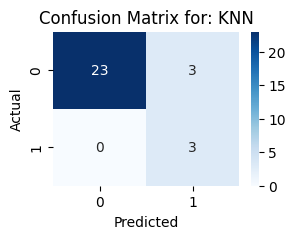

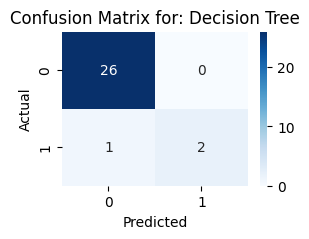

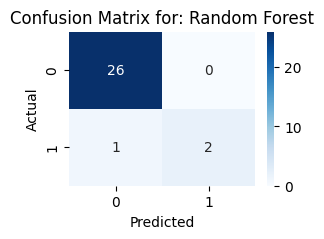

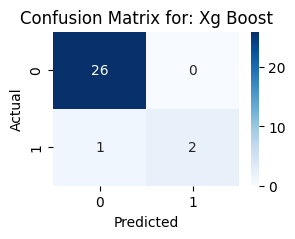

In [84]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
for model, pred in predictions.items():
    cm = confusion_matrix(y_test, pred)

    plt.figure(figsize=(3,2))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix for: {model}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    print("\n")


ROC Curve

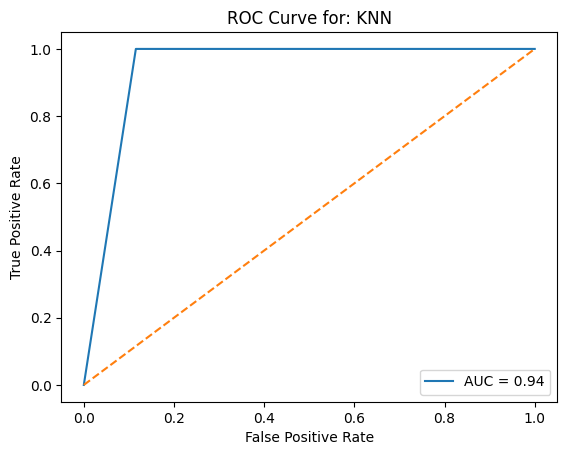

/n


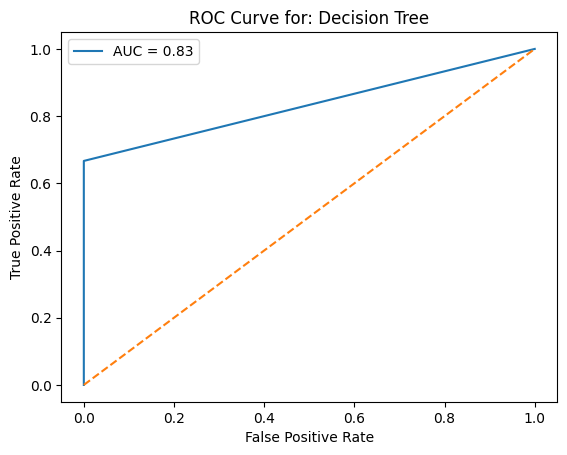

/n


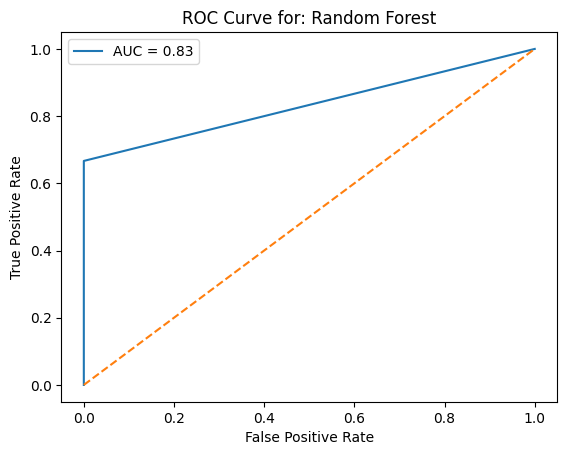

/n


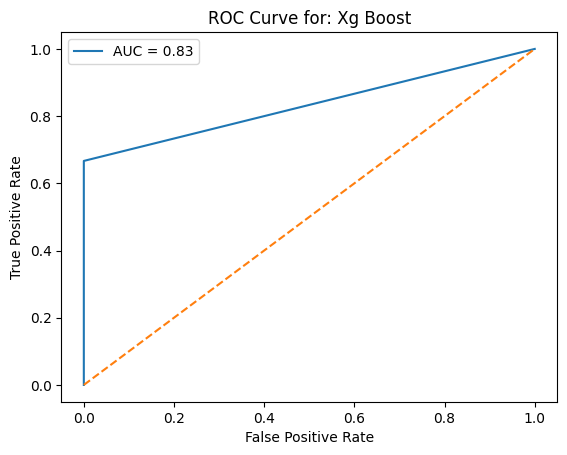

/n


In [85]:
from sklearn.metrics import roc_curve, auc
for model, pred in predictions.items():

    fpr, tpr, _ = roc_curve(y_test, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label="AUC = %.2f" % roc_auc)
    plt.plot([0,1],[0,1],'--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve for: {model}")
    plt.legend()
    plt.show()
    print("/n")


**Bar Graphs**

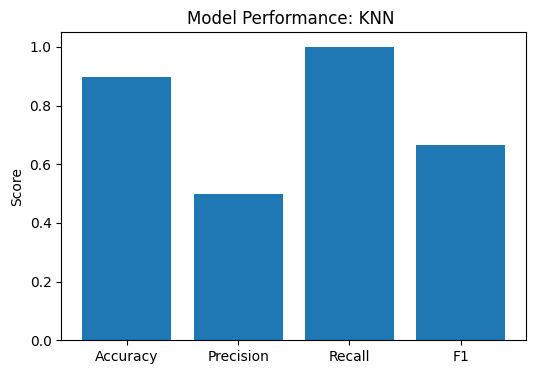

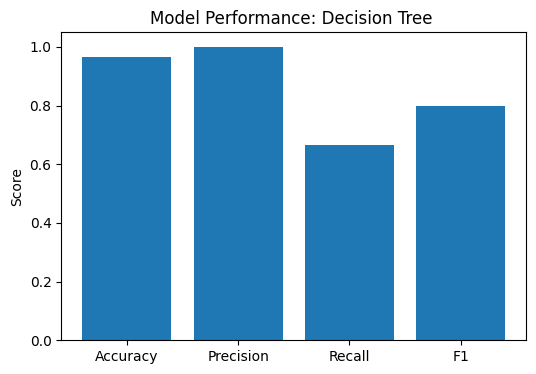

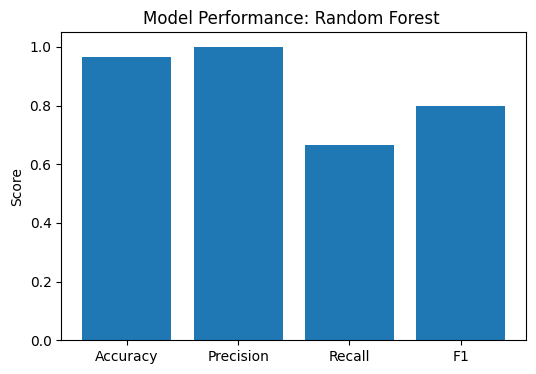

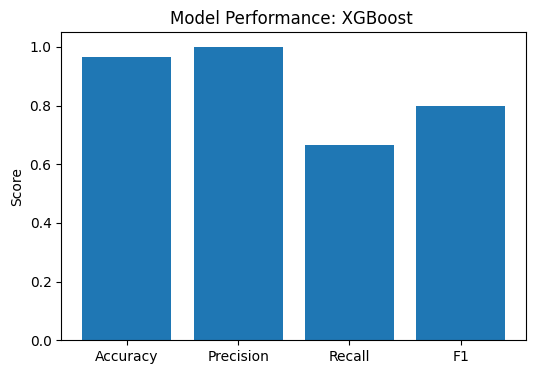

In [102]:
new_results = [sublist[1:] for sublist in results]
names = ['Accuracy','Precision','Recall','F1']
models = ['KNN','Decision Tree','Random Forest','XGBoost']
current_model = 0
import matplotlib.pyplot as plt
for metrics in new_results:

    plt.figure(figsize=(6,4))
    plt.bar(names, metrics)
    plt.title(f"Model Performance: {models[current_model]} ")
    plt.ylabel("Score")
    plt.show()
    current_model += 1

    print("")


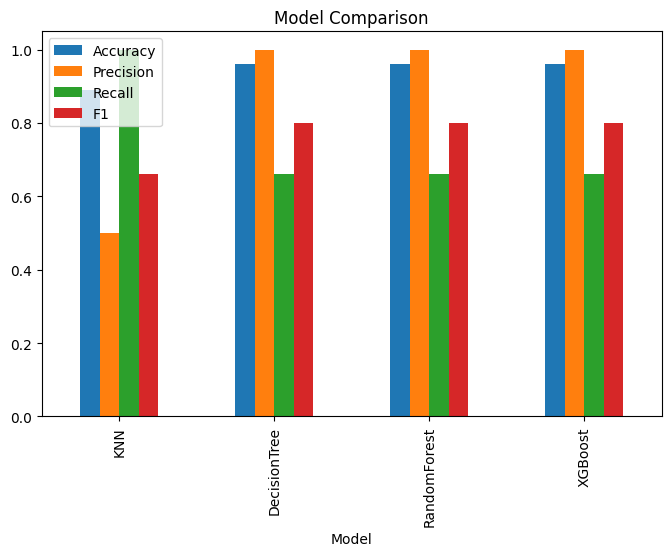

In [104]:
import pandas as pd

data = {
    "Model":["KNN","DecisionTree","RandomForest","XGBoost"],
    "Accuracy":[0.89,0.96,0.96,0.96],
    "Precision":[0.5,1.0,1.0,1.0],
    "Recall":[1.0,0.66,0.66,0.66],
    "F1":[0.66,0.80,0.80,0.80]
}

df = pd.DataFrame(data)

df.set_index("Model").plot(kind='bar', figsize=(8,5))
plt.title("Model Comparison")
plt.show()


BEST-FIT XgBoost

SAVING XGBoost

In [88]:
import joblib

joblib.dump(xg_clas, "xg_flood_model.pkl")


['xg_flood_model.pkl']

In [89]:
joblib.dump(features, "model_columns.pkl")

['model_columns.pkl']

Save Scaler Separately

In [90]:
joblib.dump(scaler, "xg_scaler.pkl")


['xg_scaler.pkl']

Load Model & Scaler

In [91]:
xg_model = joblib.load("xg_flood_model.pkl")
xg_scaler = joblib.load("xg_scaler.pkl")


Single Prediction Code (Deployment Check)

In [92]:
import numpy as np

sample_input = np.array([[36,	2648.3,	28.8,	283.7,	2023.6]])

sample_input_scaled = xg_scaler.transform(sample_input)

prediction = xg_model.predict(sample_input_scaled)

print("Prediction:", prediction)


Prediction: [0]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


User-Friendly Prediction Output

In [93]:
if prediction[0] == 1:
    print("🌊 Flood Expected")
else:
    print("✅ No Flood Expected")


✅ No Flood Expected


In [94]:
row = df[features].iloc[7:8]     # first row
true_label = df["flood"].iloc[7]

scaled = scaler.transform(row)
pred = xg_model.predict(scaled)

print("True:", true_label)
print("Pred:", pred)


True: 0
Pred: [0]


In [95]:
row


,Cloud Cover,ANNUAL,Jan-Feb,Mar-May,Jun-Sep
7,36,2648.3,28.8,283.7,2023.6


Feature Order Reference (DO NOT CHANGE)